Load dataset

In [2]:
# Import PyDrive and associated libraries.
# This only needs to be done once per notebook.
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# Download the data file based on its file ID.
#https://drive.google.com/drive/folders/1S7HLV6XKtF_Ur4gCD44UajAQTmWybx7S?usp=sharing
folder_id = '1S7HLV6XKtF_Ur4gCD44UajAQTmWybx7S'
downloaded = drive.CreateFile({'id': folder_id})
# print('Downloaded content "{}"'.format(downloaded.GetContentString()))

Go to the following link in your browser:

    https://accounts.google.com/o/oauth2/auth?response_type=code&client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=openid+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fuserinfo.email+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fcloud-platform+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fappengine.admin+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fcompute+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Faccounts.reauth+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&state=dgYdj6eILb4s8353cR3N2zFbwNOo8a&prompt=consent&access_type=offline&code_challenge=1NUPCk_Lhv7pJHQ9LiVBEMLtct0lGTbxRxnFPQTFFCA&code_challenge_method=S256

Enter verification code: 


AuthorizationError: ignored

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
# !unzip -uq "/content/drive/My Drive/Hackverse Creative_junk team/archive.zip" -d "/content/drive/My Drive/Hackverse Creative_junk team/CNN_model.ipynb"
!unzip "/content/drive/My Drive/Hackverse Creative_junk team/archive.zip"

Archive:  /content/drive/My Drive/Hackverse Creative_junk team/archive.zip
  inflating: india_food_21_small/butter_chicken/00000000.jpg  
  inflating: india_food_21_small/butter_chicken/00000001.jpg  
  inflating: india_food_21_small/butter_chicken/00000002.jpg  
  inflating: india_food_21_small/butter_chicken/00000003.jpg  
  inflating: india_food_21_small/butter_chicken/00000004.jpg  
  inflating: india_food_21_small/butter_chicken/00000005.jpg  
  inflating: india_food_21_small/butter_chicken/00000006.jpg  
  inflating: india_food_21_small/butter_chicken/00000008.jpg  
  inflating: india_food_21_small/butter_chicken/00000009.jpg  
  inflating: india_food_21_small/butter_chicken/00000010.jpg  
  inflating: india_food_21_small/butter_chicken/00000011.jpg  
  inflating: india_food_21_small/butter_chicken/00000012.jpg  
  inflating: india_food_21_small/butter_chicken/00000014.jpg  
  inflating: india_food_21_small/butter_chicken/00000015.jpg  
  inflating: india_food_21_small/butter_chi

In [8]:
image_size = 224

In [9]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1/255)
batch_size = 10
train_data_dir = "/content/india_food_21_small"

train_datagen = ImageDataGenerator(rescale=1./255,
    shear_range=0.1,
    zoom_range=0.1,
    # horizontal_flip=True,
    validation_split=0.1,# set validation split
    rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
    # zoom_range = 0.1, # Randomly zoom image 
    width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
    horizontal_flip=True,  # randomly flip images
    vertical_flip=True) 

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(image_size, image_size),
    batch_size=batch_size,
    class_mode='binary',
    subset='training') # set as training data

validation_generator = train_datagen.flow_from_directory(
    train_data_dir, # same directory as training data
    target_size=(image_size, image_size),
    batch_size=batch_size,
    class_mode='binary',
    subset='validation') # set as validation data

# model.fit_generator(
#     train_generator,
#     steps_per_epoch = train_generator.samples // batch_size,
#     validation_data = validation_generator, 
#     validation_steps = validation_generator.samples // batch_size,
#     epochs = nb_epochs)

Found 414 images belonging to 21 classes.
Found 38 images belonging to 21 classes.


In [10]:
# train_ds = tf.keras.preprocessing.image_dataset_from_directory(
#     "../input/indian-food-classification/Food Classification",
#     validation_split=0.2,
#     subset="training",
#     seed=1337,
#     image_size=image_size,
#     batch_size=batch_size,
#     label_mode="categorical"
# )

Create the Model

In [11]:
#Import libraries
import numpy as np 
import pandas as pd 
import os
import matplotlib.pyplot as plt
import cv2 
from random import shuffle 
from tqdm import tqdm 
from PIL import Image
import warnings
warnings.filterwarnings('ignore')
import os
# print(os.listdir("../<file>"))
import csv
import tensorflow as tf
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
print(tf.__version__)
# from keras.datasets import cifar10
%matplotlib inline

2.4.1


In [12]:
# image_size = 224 #It was set to 224 above

In [13]:
!pip install h5py

In [14]:
# from keras.models import Model
epochs = 5
batch_size = 10


model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(image_size,image_size, 3)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(21, activation='softmax')
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# model.summary()
earlystopper = EarlyStopping(monitor='val_accuracy', patience=10, verbose=1)
reduce_lr = ReduceLROnPlateau(monitor='val_accuracy', factor=0.5, patience=2, 
                                   verbose=1, mode='max', min_lr=0.00001)

# model.fit_generator(generator=train_generator,
#                     validation_data=validation_generator,
#                     use_multiprocessing=True,
#                     workers=6)

history = model.fit_generator(generator=train_generator,
                              epochs = epochs, validation_data = validation_generator,
                              verbose = 1, 
                              steps_per_epoch = 40, #x_train.shape[0] // batch_size
                              callbacks=[reduce_lr, earlystopper],
                              )


Epoch 1/5
40/40 [==============================] - 21s 358ms/step - loss: 4.6399 - accuracy: 0.0449 - val_loss: 3.1101 - val_accuracy: 0.0526
Epoch 2/5
40/40 [==============================] - 15s 376ms/step - loss: 3.0067 - accuracy: 0.0859 - val_loss: 2.9754 - val_accuracy: 0.0526
Epoch 3/5
40/40 [==============================] - 15s 382ms/step - loss: 2.8874 - accuracy: 0.1364 - val_loss: 2.9274 - val_accuracy: 0.0526
Epoch 4/5
40/40 [==============================] - 15s 379ms/step - loss: 2.7768 - accuracy: 0.1096 - val_loss: 3.0298 - val_accuracy: 0.1053
Epoch 5/5
40/40 [==============================] - 15s 380ms/step - loss: 2.7031 - accuracy: 0.1832 - val_loss: 2.9049 - val_accuracy: 0.0526


In [15]:
model.save('best_model.h5')

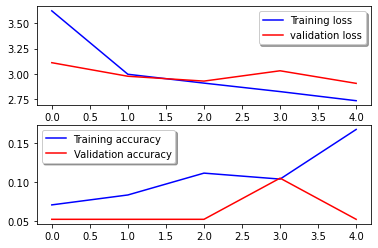

In [17]:
# Plot the loss and accuracy curves for training and validation 
fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)

In [19]:
from google.colab import files
uploaded = files.upload()

Saving idli.jpg to idli.jpg


In [28]:
# predict results
test_image_path = "/content/idli.jpg"
image = cv2.imread(test_image_path)
test_image = cv2.resize(image, (image_size, image_size), interpolation = cv2.INTER_NEAREST)
test_image = np.expand_dims(test_image, axis=0)
results = model.predict(test_image)

# select the indix with the maximum probability
results = np.argmax(results,axis = 1)
results[0]

8

In [30]:
class_list = list(train_generator.class_indices.keys())
class_list[8]

'idli'

In [ ]:
# # test_loss, test_acc = model.evaluate(test_images, test_labels)
# print(test_acc)
# loss, accuracy = model.evaluate(x_test, y_test, verbose=1)
# loss_v, accuracy_v = model.evaluate(x_validate, y_validate, verbose=1)
# print("Validation: accuracy = %f  ;  loss_v = %f" % (accuracy_v, loss_v))
# print("Test: accuracy = %f  ;  loss = %f" % (accuracy, loss))
# model.save("model.h5")